In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loguru import logger
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [3]:
file_path = "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811.csv"

df_exo = pd.read_csv(file_path)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic']
18
sy_pnum
2    10
3     3
4     2
5     1
6     1
8     1
Name: hostname, dtype: int64


In [4]:
df_interp = interp_db(df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp.csv")

2025-08-12 21:10:54.414 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-12 21:10:54.417 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 55
2025-08-12 21:10:54.436 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-12 21:10:54.437 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-12 21:10:54.441 | INFO     | exonamd.run:interp_db:192 - No duplicates found


2025-08-12 21:10:54.441 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-12 21:10:54.443 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-12 21:10:54.444 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:54.485 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-12 21:10:54.487 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:55.364 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-12 21:10:55.366 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-12 21:10:55.367 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-12 21:10:55.368 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-12 21:10:55.379 | INFO     | exonamd.run:interp_db:233 - Removing 0 systems: []
2025-08-12 21:10:55.381 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-12 21:10:55.382 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:55.488 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-12 21:10:55.490 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:55.528 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-12 21:10:55.529 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:55.646 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-12 21:10:55.648 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 21:10:55.782 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-12 21:10:55.784 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-12 21:10:55.789 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp.csv


2025-08-12 21:10:55.962 | DEBUG    | exonamd.run:calc_namd:331 - Dropping columns that are no longer needed
2025-08-12 21:10:55.964 | DEBUG    | exonamd.run:calc_namd:333 - Columns dropped
2025-08-12 21:10:55.965 | INFO     | exonamd.run:calc_namd:353 - Computing the absolute NAMD
2025-08-12 21:10:56.012 | INFO     | exonamd.run:calc_namd:361 - Absolute NAMD computed


2025-08-12 21:10:56.052 | INFO     | exonamd.run:calc_namd:455 - Computing the Monte Carlo absolute NAMD
2025-08-12 21:10:56.055 | DEBUG    | exonamd.solve:solve_amdk_mc:310 - Computing abs AMD for planet AU Mic in host AU Mic
2025-08-12 21:10:56.056 | DEBUG    | exonamd.solve:solve_amdk_mc:314 - Parameters for abs AMD: mass=8.95, eccen=0.0, di=17.49, sma=0.0873, masserr1=2.9, masserr2=-2.25, eccenerr1=0.0, eccenerr2=0.0, dierr1=21.05, dierr2=-29.65, smaerr1=0.00165, smaerr2=-0.00165
2025-08-12 21:10:56.057 | DEBUG    | exonamd.solve:solve_amdk_mc:320 - Sigmas for abs AMD: mass_sigma=2.575, eccen_sigma=0.0, di_sigma=25.35, sma_sigma=0.00165
2025-08-12 21:10:56.067 | DEBUG    | exonamd.solve:solve_amdk_mc:310 - Computing abs AMD for planet HD 118203b in host HD 118203
2025-08-12 21:10:56.068 | DEBUG    | exonamd.solve:solve_amdk_mc:314 - Parameters for abs AMD: mass=689.6, eccen=0.31, di=8.65, sma=0.07082, masserr1=25.4, masserr2=-25.4, eccenerr1=0.007, eccenerr2=-0.007, dierr1=8.1, die

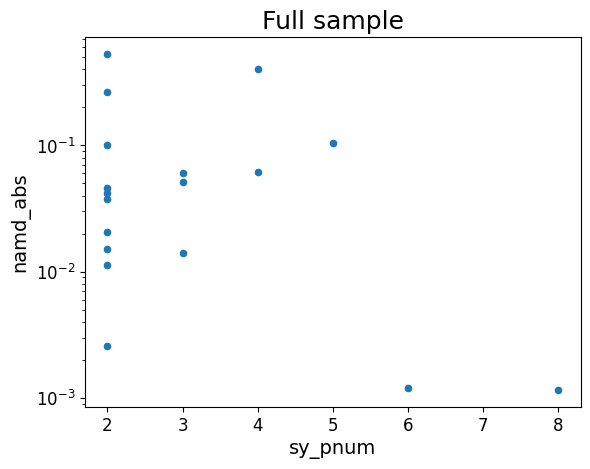

In [5]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    which=["abs"],
    # which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e4),
)

2025-08-12 21:10:57.343 | INFO     | __main__:<module>:1 - Plotting the absolute NAMD vs. multiplicity
2025-08-12 21:10:57.371 | DEBUG    | exonamd.plot:pop_plot:94 - Found 0 values above 1.0 for namd_abs_q50


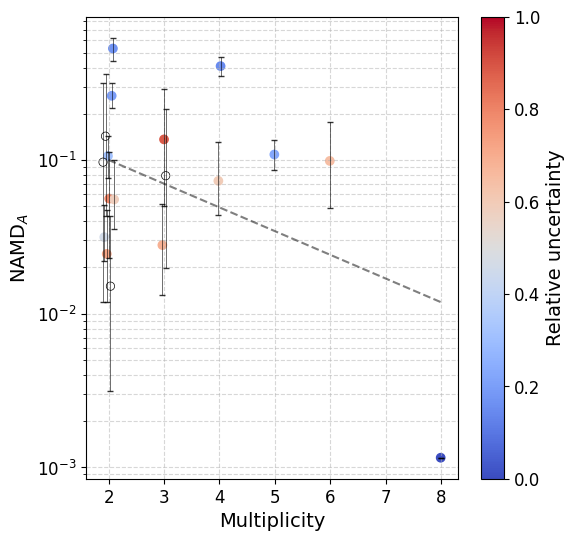

2025-08-12 21:10:58.085 | INFO     | __main__:<module>:15 - Plot done


In [6]:
logger.info("Plotting the absolute NAMD vs. multiplicity")
pop_plot(
    df=df_namd.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        include_groups=False,
    ),
    kind="abs",
    # title="Core planets",
    which="namd",
    yscale="log",
    outpath="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/plots/exo_namd_abs_paper.pdf",
    replace_nan=True,
    xoffs=0.1,
)
logger.info("Plot done")

2025-08-12 21:10:58.923 | INFO     | __main__:<module>:7 - Selecting the host: K2-290
2025-08-12 21:10:58.927 | INFO     | __main__:<module>:9 - Host selected
2025-08-12 21:10:58.929 | INFO     | __main__:<module>:11 - Computing the Monte Carlo relative NAMD
2025-08-12 21:10:58.930 | DEBUG    | exonamd.solve:solve_amdk_mc:310 - Computing abs AMD for planet K2-290 b in host K2-290
2025-08-12 21:10:58.931 | DEBUG    | exonamd.solve:solve_amdk_mc:314 - Parameters for abs AMD: mass=10.572547555448569, eccen=0.0, di=58.9, sma=0.0923, masserr1=2.8506196612608328, masserr2=-2.5891470128042107, eccenerr1=0.0, eccenerr2=0.0, dierr1=14.0, dierr2=-11.0, smaerr1=0.0066, smaerr2=-0.0066
2025-08-12 21:10:58.932 | DEBUG    | exonamd.solve:solve_amdk_mc:320 - Sigmas for abs AMD: mass_sigma=2.7198833370325217, eccen_sigma=0.0, di_sigma=12.5, sma_sigma=0.0066
2025-08-12 21:10:58.940 | DEBUG    | exonamd.solve:solve_amdk_mc:310 - Computing abs AMD for planet K2-290 c in host K2-290
2025-08-12 21:10:58.94

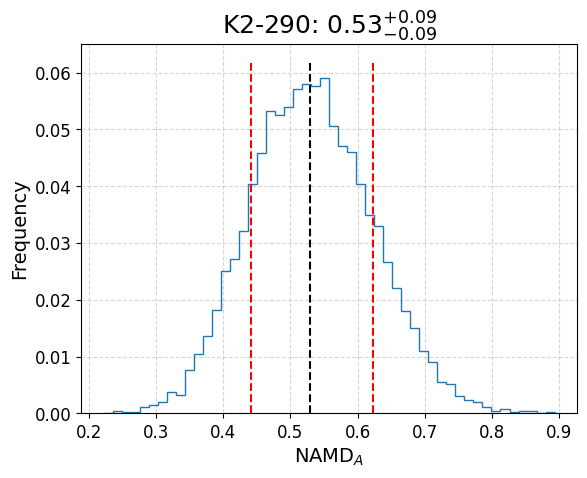

2025-08-12 21:10:59.117 | INFO     | __main__:<module>:32 - Plot done


In [7]:
# Task 1: sample the NAMD for a given host
hostname = "K2-290"
kind = "abs"
Npt = int(1e4)
threshold = 100

logger.info(f"Selecting the host: {hostname}")
host = df_namd[df_namd["hostname"] == hostname]
logger.info("Host selected")

logger.info("Computing the Monte Carlo relative NAMD")
retval = solve_namd_mc(
    host=host,
    kind=f"{kind}",
    Npt=Npt,
    threshold=threshold,
    full=True,
    use_trunc_normal=True,
)
logger.info("Values computed")

# Task 2: plot the NAMD for a given host
logger.info("Plotting the relative NAMD distribution")
simple_plot(
    df=retval,
    kind=f"{kind}",
    title=hostname,
    which="namd",
    scale="linear",
    # outpath=outpath,
)
logger.info("Plot done")

In [8]:
df_namd[df_namd["hostname"] == hostname].to_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/deleteme.csv",
    index=False,
)